## Importing libraries

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,log_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.regularizers import L2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('Dataset.xlsx')

In [4]:
df = df.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)

In [5]:
df['Label'].value_counts()

DrDoS_UDP    73958
Syn          68540
BENIGN        1500
Name: Label, dtype: int64

## Finding Important Features

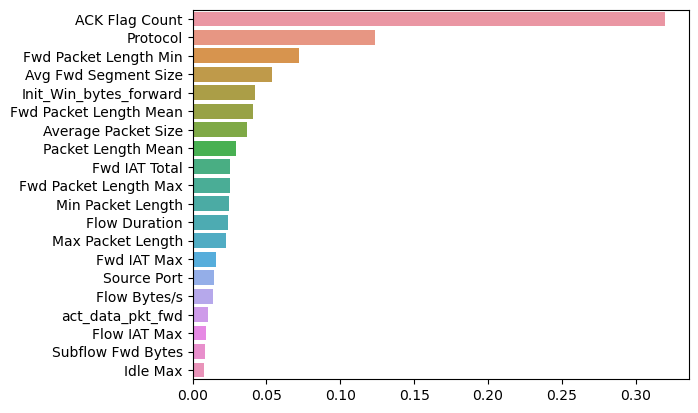

In [7]:
X = df.drop("Label", axis=1)  # independent columns
y = df['Label']

model = ExtraTreesClassifier(random_state=23)
model.fit(X, y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
top_20_features = feat_importances.nlargest(20)

sns.barplot(x=top_20_features.values, y=top_20_features.index)
plt.show()

## Creating dataframe of important features

In [8]:
df = df[['Idle Max',

'Subflow Fwd Bytes',

'Flow IAT Max',

'act_data_pkt_fwd',

'Flow Bytes/s',

'Source Port',

'Fwd IAT Max',

'Max Packet Length',

'Flow Duration',

'Min Packet Length',

'Fwd Packet Length Max',

'Fwd IAT Total',

'Packet Length Mean',

'Average Packet Size',

'Fwd Packet Length Mean',

'Init_Win_bytes_forward',

'Avg Fwd Segment Size',

'Fwd Packet Length Min',

'Protocol',

'ACK Flag Count',
                    
'Label']]

## Visualizing Target Variable

DrDoS_UDP    73958
Syn          68540
BENIGN        1500
Name: Label, dtype: int64

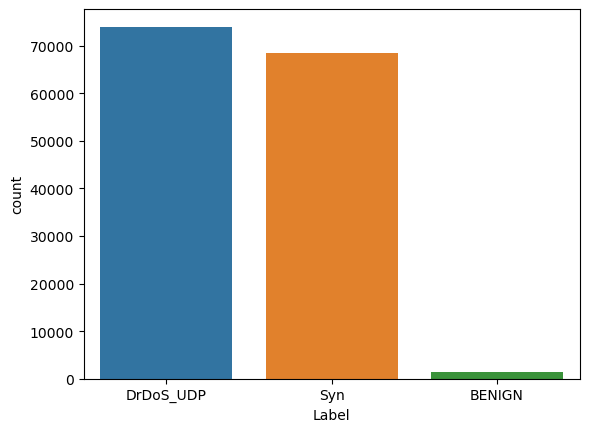

In [9]:
#!pip install seaborn
sns.countplot(x=df['Label'])
df['Label'].value_counts()

### Scaling data 

In [46]:
X1= df.drop('Label',axis=1)
y1= df['Label'] 

### Balancing Data

In [47]:
# Define the oversampler
adasyn = ADASYN(random_state=42)

# Oversample the data
X_resampled, y_resampled = adasyn.fit_resample(X1, y1)

print(f"Original class counts: {Counter(y1)}")
print(f"Resampled class counts: {Counter(y_resampled)}")

Original class counts: Counter({'DrDoS_UDP': 73958, 'Syn': 68540, 'BENIGN': 1500})
Resampled class counts: Counter({'BENIGN': 73965, 'DrDoS_UDP': 73958, 'Syn': 73906})


In [12]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Downcast numeric columns to int8 and float32
for col in numeric_cols:
    if df[col].dtype == 'int64':
        df[col] = pd.to_numeric(df[col], downcast='integer')
    elif df[col].dtype == 'float64':
        df[col] = pd.to_numeric(df[col], downcast='float')

In [13]:
scaler = StandardScaler().set_output(transform='pandas')  
X1 =scaler.fit_transform(X_resampled) 
le = LabelEncoder()
le_y = le.fit_transform(y_resampled)

# Models

## Logistic Regression

In [18]:
#Encoding Target variables
le = LabelEncoder()
le_y = le.fit_transform(y_resampled)
#Splitting dataset into train and test set
X_train , X_test , y_train,y_test = train_test_split(X1,le_y,test_size=0.3,random_state=23)
#Applying Logistic Regression Model
lr= LogisticRegression(penalty='l2',multi_class='ovr',solver='saga',l1_ratio=0.5)
lr_model = lr.fit(X_train,y_train)
y_pred_prob = lr_model.predict_proba(X_test)
ypred = lr_model.predict(X_test)

In [19]:
print("Accuracy of Logistic Regression Model:",lr_model.score(X_test,y_test)*100,"%")

Accuracy of Logistic Regression Model: 98.23438368720792 %


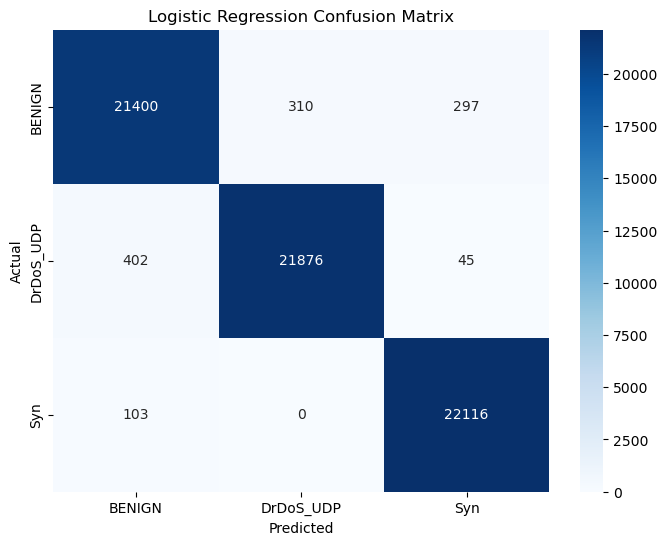

In [24]:
conf_matrix = metrics.confusion_matrix(y_test, ypred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y1), yticklabels=np.unique(y1))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

## Checking accuracy of Logistic Regression on unseen Data

In [25]:
df2 = pd.read_excel("Dataset2.xlsx")

In [26]:
df2 = df2[['Idle Max',

'Subflow Fwd Bytes',

'Flow IAT Max',

'act_data_pkt_fwd',

'Flow Bytes/s',

'Source Port',

'Fwd IAT Max',

'Max Packet Length',

'Flow Duration',

'Min Packet Length',

'Fwd Packet Length Max',

'Fwd IAT Total',

'Packet Length Mean',

'Average Packet Size',

'Fwd Packet Length Mean',

'Init_Win_bytes_forward',

'Avg Fwd Segment Size',

'Fwd Packet Length Min',

'Protocol',

'ACK Flag Count',
                    
'Label']]

In [27]:
numeric_cols = df2.select_dtypes(include=['int64', 'float64']).columns

# Downcast numeric columns to int8 and float32
for col in numeric_cols:
    if df2[col].dtype == 'int64':
        df2[col] = pd.to_numeric(df2[col], downcast='integer')
    elif df2[col].dtype == 'float64':
        df2[col] = pd.to_numeric(df2[col], downcast='float')

In [91]:
X= df2.drop('Label',axis=1)
y= df2['Label'] 

In [89]:
X =scaler.fit_transform(X) 
le = LabelEncoder()
le_y = le.fit_transform(y)

In [23]:
print("Accuracy of Logistic Regression Model:",lr_model.score(X,le_y)*100)

Accuracy of Logistic Regression Model: 99.19590643274854


## Hyper parameter tuning

>0.0001 0.987 (0.000)
>0.0010 0.987 (0.000)
>0.0100 0.988 (0.001)
>0.1000 0.993 (0.001)
>1.0000 0.994 (0.001)


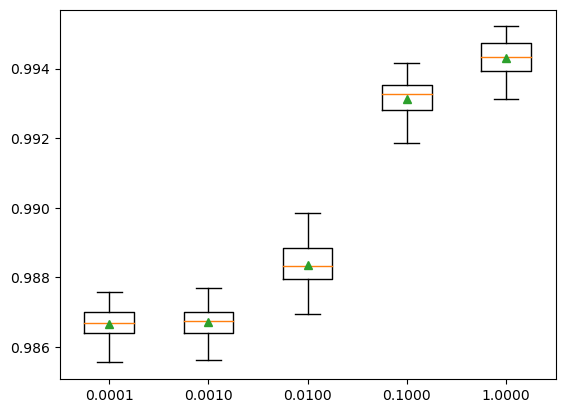

In [69]:
# tune regularization for multinomial logistic regression
#Tried for solver: 'saga','lbfgs','newton-cg'. Got same accuracy

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


# get a list of models to evaluate
def get_models():
    models = dict()
    for p in [0.0001, 0.001, 0.01, 0.1, 1.0]:
        # create name for model
        key = '%.4f' % p
        # turn off penalty in some cases
        models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

X = df.drop('Label',axis=1)
y = df['Label'] 
X =scaler.fit_transform(X) 
le = LabelEncoder()
le_y = le.fit_transform(y)

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model and collect the scores
    scores = evaluate_model(model, X, le_y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize progress along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Multinomial Naive Bayes

In [48]:
clf = MultinomialNB()

X1= df.drop('Label',axis=1)
y1= df['Label'] 

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=23)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf.fit(X_train_scaled, y_train)
ypred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test,ypred)
print("Accuracy of Multinomial Naive Bayes: ",accuracy*100,'%')

Accuracy of Multinomial Naive Bayes:  98.73842592592592 %


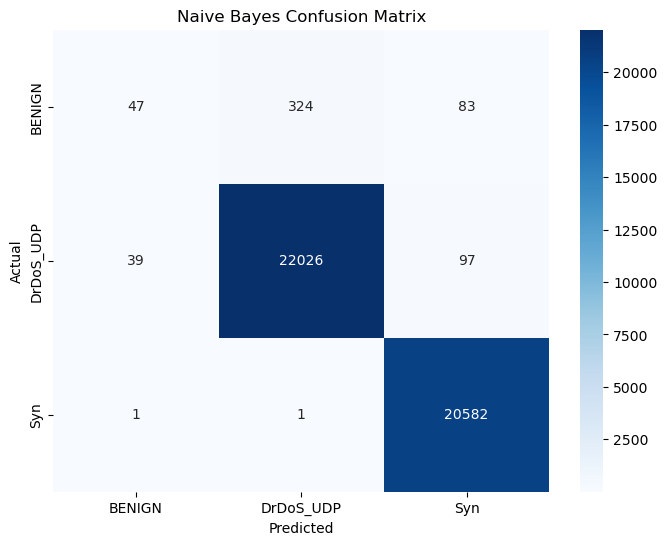

In [49]:
conf_matrix = metrics.confusion_matrix(y_test, ypred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y1), yticklabels=np.unique(y1))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

## Checking accuracy of MultinomialNB on unseen Data

In [50]:
X= df2.drop('Label',axis=1)
y= df2['Label'] 

scaler = MinMaxScaler()
X =scaler.fit_transform(X) 

In [38]:
print("MultiNomial Naive Bayes Accuracy: ",clf.score(X,y)*100,"%")

MultiNomial Naive Bayes Accuracy:  71.6374269005848 %


## KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn.fit(X_train_scaled, y_train)
ypred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test,ypred)
print("Accuracy of KNeighboursClassifer: ",accuracy*100,"%")

Accuracy of KNeighboursClassifer:  99.90383026040962 %


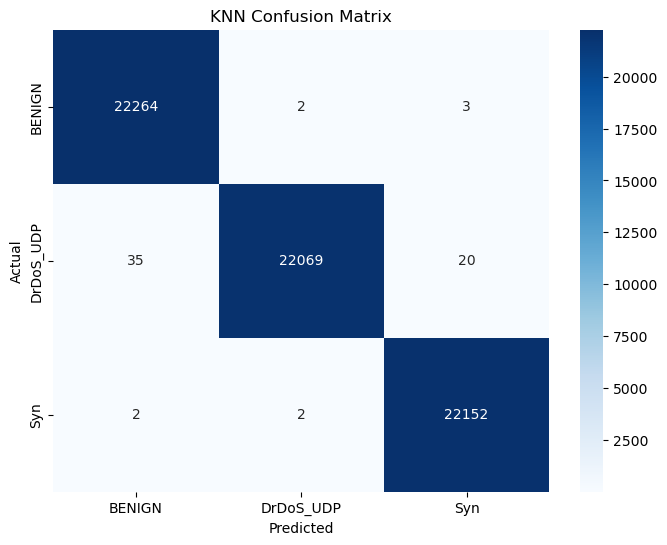

In [55]:
conf_matrix = metrics.confusion_matrix(y_test, ypred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y1), yticklabels=np.unique(y1))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

In [60]:
X= df2.drop('Label',axis=1)
y= df2['Label'] 

scaler = MinMaxScaler()
X =scaler.fit_transform(X)

In [61]:
ypred = knn.predict(X)

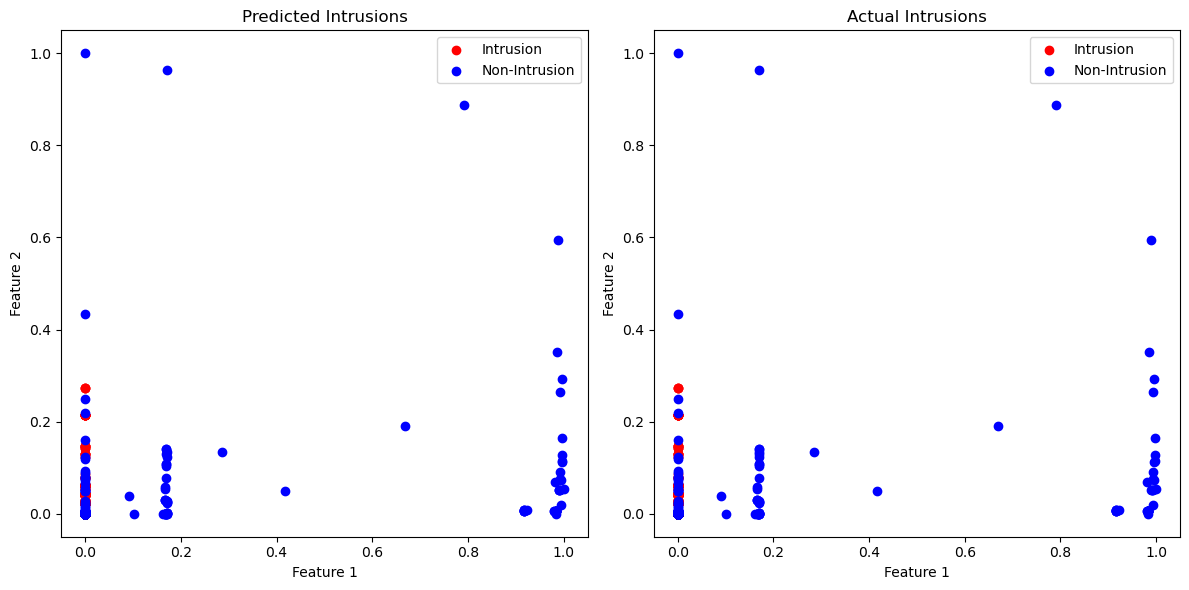

In [62]:
non_intrusion_indices = np.where(ypred == 'BENIGN')[0]
intrusion_indices = np.where(np.logical_or(ypred == 'DrDoS_UDP' , ypred == 'Syn'))[0]


intrusion_data = X[intrusion_indices]
non_intrusion_data = X[non_intrusion_indices]


non_intrusion_indices1 = np.where(y == 'BENIGN')[0]
intrusion_indices1 = np.where(np.logical_or(y == 'DrDoS_UDP' , y == 'Syn'))[0]

intrusion_data1 = X[intrusion_indices1]
non_intrusion_data1 = X[non_intrusion_indices1]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(intrusion_data[:, 0], intrusion_data[:, 1], color='red', label='Intrusion')
plt.scatter(non_intrusion_data[:, 0], non_intrusion_data[:, 1], color='blue', label='Non-Intrusion')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Predicted Intrusions')

plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(intrusion_data1[:, 0], intrusion_data1[:, 1], color='red', label='Intrusion')
plt.scatter(non_intrusion_data1[:, 0], non_intrusion_data1[:, 1], color='blue', label='Non-Intrusion')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Actual Intrusions')

plt.legend()

plt.tight_layout()

plt.show()

## Checking accuracy of KNeighboursClassifier on Unseen Data

In [58]:
print("Accuracy of KNeighboursClassifer on unseen data: ",knn.score(X,y)*100,"%")

Accuracy of KNeighboursClassifer on unseen data:  98.61111111111111 %


## Gradient Boosting

In [74]:
X_resampled, y_resampled = shuffle(X_resampled, y_resampled,random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
gbm = GradientBoostingClassifier(n_estimators=50,learning_rate=0.1,random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gbm.fit(X_train_scaled, y_train)

y_pred = gbm.predict(X_test_scaled)
acc=accuracy_score(y_test,y_pred)
print("Accuracy of Gradient Boosting: ",acc*100,"%")

Accuracy of Gradient Boosting:  99.76408360756736 %


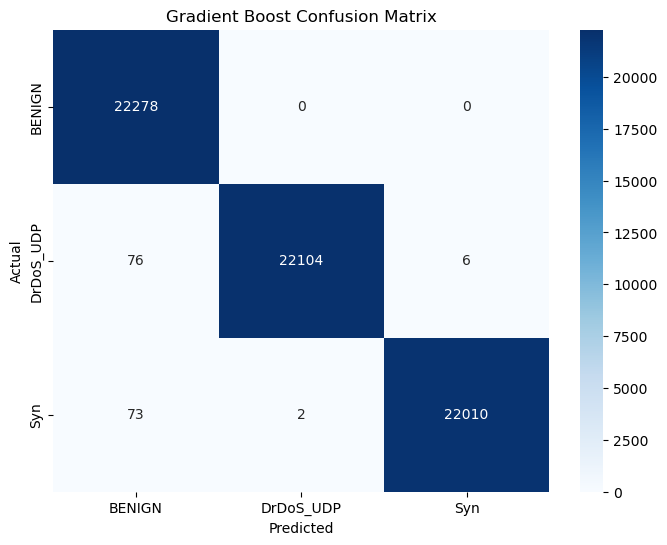

In [75]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y1), yticklabels=np.unique(y1))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boost Confusion Matrix')
plt.show()

## Checking accuracy of Gradient Boosting on Unseen Data

In [46]:
print("Accuracy of Gradient Boost on unseen data: ",gbm.score(X,y)*100,"%")

Accuracy of Gradient Boost:  98.90350877192982 %


### Random Forest


In [47]:
X = df.drop('Label', axis=1)
y = df['Label']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data preprocessing (scaling features and encoding labels)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Training the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train_encoded)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy of Random Forest:", accuracy*100,"%")

Accuracy: 0.9996180555555556


## Hyper Parameter Tuning

In [54]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1,le_y, test_size=0.2, random_state=42)

# Data preprocessing (scaling features and encoding labels)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform GridSearchCV
grid_search.fit(X_train_scaled, y_train_encoded)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best estimator
best_rf_classifier = grid_search.best_estimator_

# Predicting on the test set
y_pred = best_rf_classifier.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy of Random Forest:", accuracy)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9995266645629536


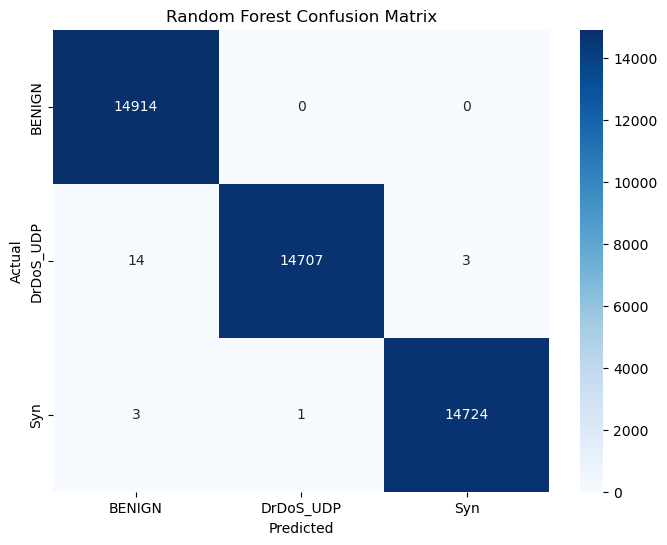

In [58]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y1), yticklabels=np.unique(y1))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

### Checking Accuracy of Random Forest on unseen data


In [56]:
X= df2.drop('Label',axis=1)
y= df2['Label']
X =scaler.fit_transform(X) 
le = LabelEncoder()
le_y = le.fit_transform(y)
print("Accuracy of Random Forest on unseen data: ",best_rf_classifier.score(X,le_y)*100,"%")

Accuracy of Random Forest:  66.15497076023392 %


### Desicion Tree

In [20]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, le_y, test_size=0.2, random_state=42)

# Data preprocessing (scaling features and encoding labels)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],  # Limiting the maximum depth
    'min_samples_split': [2, 5],  # Reducing the minimum samples required to split
    'min_samples_leaf': [1, 2]  # Reducing the minimum samples required in leaf nodes
}

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV with Stratified K-Fold cross-validation
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(dt_classifier, param_grid, cv=stratified_cv, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train_encoded)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best parameters to train the model
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train_scaled, y_train_encoded)

# Predicting on the test set
y_pred = best_dt_classifier.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy of Decision Tree:", accuracy*100,'%')


Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9995548373543507
Accuracy of Decision Tree: 99.96168236938196 %


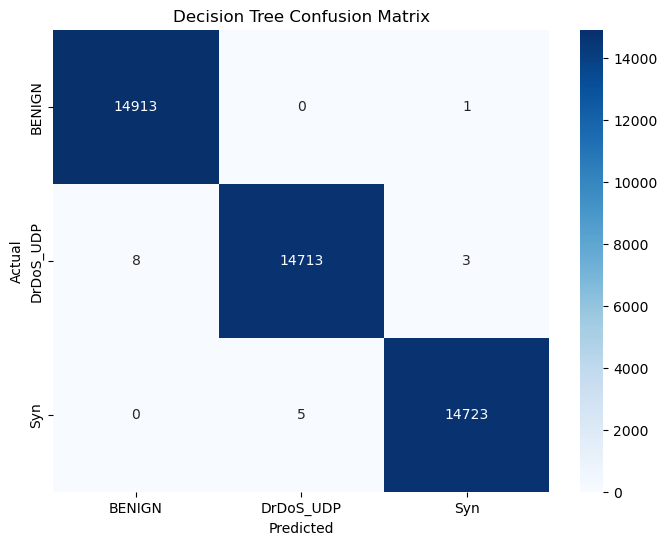

In [24]:
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y1), yticklabels=np.unique(y1))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

### Checking Accuracy of Desicion Tree on Unseen data

In [21]:
X= df2.drop('Label',axis=1)
y= df2['Label']
X =scaler.fit_transform(X) 
le = LabelEncoder()
le_y = le.fit_transform(y)
print("Accuracy of Decision Tree: ",best_dt_classifier.score(X,le_y)*100,"%")

Accuracy of Decision Tree:  58.62573099415205 %


### Adaboost and XGBoost

In [65]:
X = df.drop('Label', axis=1)
y = df['Label']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data preprocessing (scaling features and encoding labels)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Hyperparameter tuning for AdaBoost
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

adaboost_classifier = AdaBoostClassifier(algorithm='SAMME',random_state=42)
grid_search_adaboost = GridSearchCV(adaboost_classifier, param_grid_adaboost, cv=5, scoring='accuracy')
grid_search_adaboost.fit(X_train_scaled, y_train_encoded)
best_params_adaboost = grid_search_adaboost.best_params_
print("Best Parameters for AdaBoost:", best_params_adaboost)

# Training AdaBoost with the best parameters
best_adaboost_classifier = AdaBoostClassifier(algorithm='SAMME', **best_params_adaboost, random_state=42)
best_adaboost_classifier.fit(X_train_scaled, y_train_encoded)
adaboost_pred = best_adaboost_classifier.predict(X_test_scaled)
adaboost_accuracy = accuracy_score(y_test_encoded, adaboost_pred)
print("AdaBoost Accuracy:", adaboost_accuracy*100,'%')

# Hyperparameter tuning for XGBoost
param_grid_xgboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7]
}

xgb_classifier = XGBClassifier(random_state=42)
grid_search_xgboost = GridSearchCV(xgb_classifier, param_grid_xgboost, cv=5, scoring='accuracy')
grid_search_xgboost.fit(X_train_scaled, y_train_encoded)
best_params_xgboost = grid_search_xgboost.best_params_
print("Best Parameters for XGBoost:", best_params_xgboost)

# Training XGBoost with the best parameters
best_xgb_classifier = XGBClassifier(**best_params_xgboost, random_state=42)
best_xgb_classifier.fit(X_train_scaled, y_train_encoded)
xgb_pred = best_xgb_classifier.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test_encoded, xgb_pred)
print("XGBoost Accuracy:", xgb_accuracy*100,'%')


Best Parameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 200}
AdaBoost Accuracy: 99.81944444444444 %
Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
XGBoost Accuracy: 99.98263888888889 %


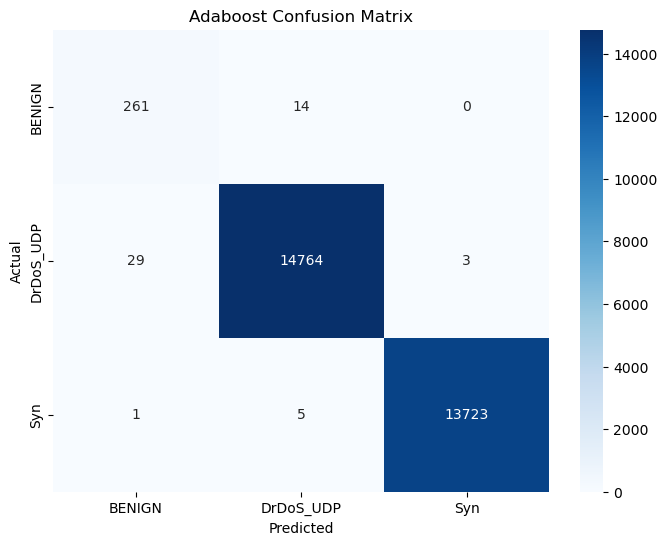

In [80]:
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test_encoded, adaboost_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y1), yticklabels=np.unique(y1))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Adaboost Confusion Matrix')
plt.show()

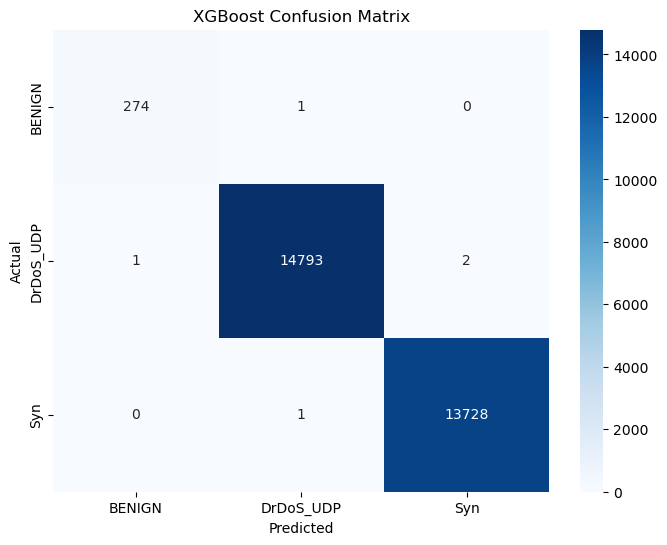

In [81]:
conf_matrix = metrics.confusion_matrix(y_test_encoded, xgb_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y1), yticklabels=np.unique(y1))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

### Checking Accuracy of Adaboost on Unseen Data

In [26]:
X= df2.drop('Label',axis=1)
y= df2['Label']
X =scaler.fit_transform(X) 
le = LabelEncoder()
le_y = le.fit_transform(y)
print("Accuracy of Adaboost model:",best_adaboost_classifier.score(X,le_y)*100,"%")

0.48026315789473684

### Checking Accuracy of XGBoost on Unseen Data

In [36]:
X= df2.drop('Label',axis=1)
y= df2['Label']
X =scaler.fit_transform(X) 
le = LabelEncoder()
le_y = le.fit_transform(y)
print("Accuracy of Gradient Boost model: ",best_xgb_classifier.score(X,le_y)*100,"%")

0.5833333333333334

## SVM Linear

In [48]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1,le_y, test_size=0.3, random_state=42)

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict using the trained classifier
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM: ", accuracy*100,"%")


Accuracy of SVM:  99.1359749958677 %


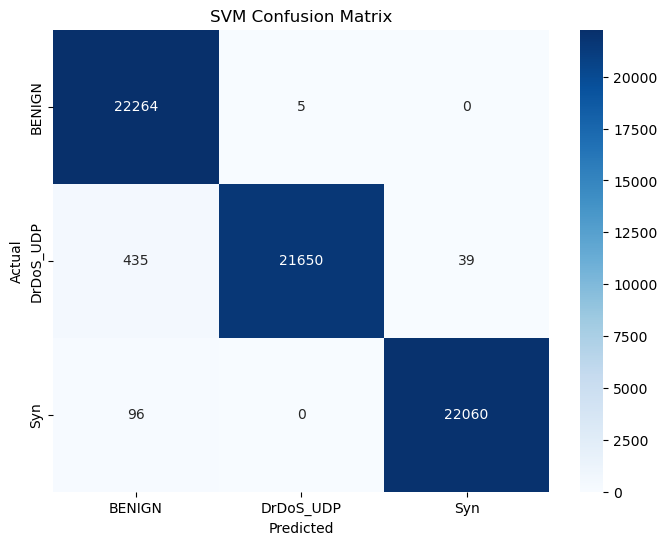

In [49]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y1), yticklabels=np.unique(y1))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

### Checking the accuracy on unseen data

In [49]:
X= df2.drop('Label',axis=1)
y= df2['Label']
X =scaler.fit_transform(X) 
le = LabelEncoder()
le_y = le.fit_transform(y)
print("Accuracy: "svm_classifier.score(X,le_y)*100,"%")

0.6849415204678363

### SVM Radial

In [41]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, le_y, test_size=0.2, random_state=42)

# Initialize SVM classifier with RBF kernel
svm_rbf_classifier = SVC(kernel='rbf')

# Train the SVM classifier with RBF kernel
svm_rbf_classifier.fit(X_train, y_train)

# Predict using the trained classifier
y_pred_rbf = svm_rbf_classifier.predict(X_test)

# Calculate accuracy for RBF kernel SVM
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy (RBF):", accuracy_rbf*100,"%")


Accuracy (RBF): 0.9949285488887887


### Checking the accuracy on unseen data

In [57]:
X= df2.drop('Label',axis=1)
y= df2['Label']
X =scaler.fit_transform(X) 
le = LabelEncoder()
le_y = le.fit_transform(y)
print("Accuracy: ",svm_rbf_classifier.score(X,le_y)*100,"%")

0.6842105263157895

## SVM Poly

In [25]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, le_y, test_size=0.3, random_state=42)

# Initialize SVM classifier with Polynomial kernel
svm_poly_classifier = SVC(kernel='poly', degree=3) # You can adjust the degree parameter as needed

# Train the SVM classifier with Polynomial kernel
svm_poly_classifier.fit(X_train, y_train)

# Predict using the trained classifier
y_pred_poly = svm_poly_classifier.predict(X_test)

# Calculate accuracy for Polynomial kernel SVM
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print("Accuracy (Polynomial):", accuracy_poly*100,"%")


Accuracy (Polynomial): 0.991434882567732


In [26]:
X= df2.drop('Label',axis=1)
y= df2['Label']
X =scaler.fit_transform(X) 
le = LabelEncoder()
le_y = le.fit_transform(y)
print("Accuracy :",svm_poly_classifier.score(X,le_y)*100,"%")

0.9883040935672515

## Tensorflow

In [83]:
scaler = StandardScaler().set_output(transform='pandas')  
X2 =scaler.fit_transform(X_resampled) 

le = LabelEncoder()
le_y = le.fit_transform(y_resampled)
X_train , X_test , y_train,y_test = train_test_split(X2,le_y,test_size=0.3,random_state=23)

op = Adam(learning_rate = 0.001)

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=L2(0.001)),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(256, activation='relu',kernel_regularizer=L2(0.001)),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(256, activation='relu',kernel_regularizer=L2(0.001)),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(3, activation='sigmoid')
])
model.compile(
    optimizer=op,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(X_train,y_train, epochs=15)


Epoch 1/15


4853/4853 [==============================] - 23s 4ms/step - loss: 0.0875 - accuracy: 0.9908
Epoch 2/15
4853/4853 [==============================] - 20s 4ms/step - loss: 0.0453 - accuracy: 0.9943
Epoch 3/15
4853/4853 [==============================] - 19s 4ms/step - loss: 0.0408 - accuracy: 0.9946
Epoch 4/15
4853/4853 [==============================] - 19s 4ms/step - loss: 0.0390 - accuracy: 0.9947
Epoch 5/15
4853/4853 [==============================] - 19s 4ms/step - loss: 0.0374 - accuracy: 0.9948
Epoch 6/15
4853/4853 [==============================] - 19s 4ms/step - loss: 0.0374 - accuracy: 0.9947
Epoch 7/15
4853/4853 [==============================] - 19s 4ms/step - loss: 0.0362 - accuracy: 0.9950
Epoch 8/15
4853/4853 [==============================] - 19s 4ms/step - loss: 0.0363 - accuracy: 0.9948
Epoch 9/15
4853/4853 [==============================] - 19s 4ms/step - loss: 0.0354 - accuracy: 0.9949
Epoch 10/15
4853/4853 [==============================] - 19s 4ms/step 

## Checking Accuracy of Tensorflow on Unseen data

In [63]:
scaler = StandardScaler().set_output(transform='pandas')  
X2 =scaler.fit_transform(X) 

le = LabelEncoder()
le_y = le.fit_transform(y)
X_train , X_test , y_train,y_test = train_test_split(X2,le_y,test_size=0.3,random_state=23)

op = Adam(learning_rate = 0.001)

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=L2(0.001)),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(256, activation='relu',kernel_regularizer=L2(0.001)),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(256, activation='relu',kernel_regularizer=L2(0.001)),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(3, activation='sigmoid')
])
model.compile(
    optimizer=op,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(X_train,y_train, epochs=15)


Epoch 1/15


30/30 [==============================] - 2s 5ms/step - loss: 0.6571 - accuracy: 0.9592
Epoch 2/15
30/30 [==============================] - 0s 4ms/step - loss: 0.3760 - accuracy: 0.9969
Epoch 3/15
30/30 [==============================] - 0s 4ms/step - loss: 0.3115 - accuracy: 0.9979
Epoch 4/15
30/30 [==============================] - 0s 4ms/step - loss: 0.2548 - accuracy: 0.9990
Epoch 5/15
30/30 [==============================] - 0s 4ms/step - loss: 0.2148 - accuracy: 0.9990
Epoch 6/15
30/30 [==============================] - 0s 4ms/step - loss: 0.1850 - accuracy: 0.9990
Epoch 7/15
30/30 [==============================] - 0s 5ms/step - loss: 0.1574 - accuracy: 1.0000
Epoch 8/15
30/30 [==============================] - 0s 5ms/step - loss: 0.1365 - accuracy: 0.9990
Epoch 9/15
30/30 [==============================] - 0s 4ms/step - loss: 0.1202 - accuracy: 0.9990
Epoch 10/15
30/30 [==============================] - 0s 4ms/step - loss: 0.1112 - accuracy: 0.9969
Epoch 11/15
30/3

## Accuracy of all Models

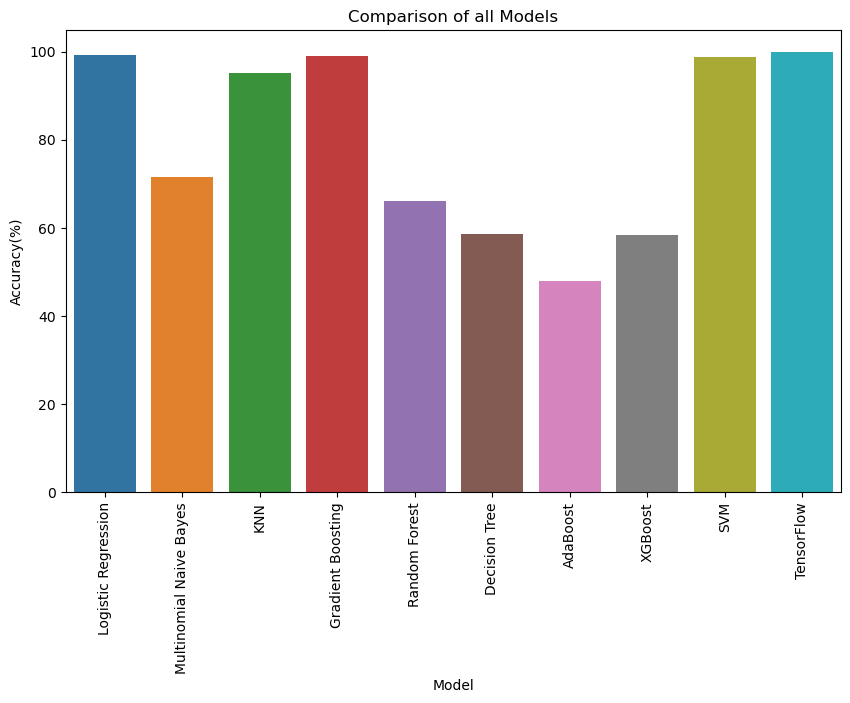

In [64]:
accuracy_dict={
   'Logistic Regression' : 99.195,
   'Multinomial Naive Bayes': 71.637,
   'KNN': 95.175,
   'Gradient Boosting': 98.903,
   'Random Forest': 66.154,
   'Decision Tree': 58.625,
   'AdaBoost': 48.026,
   'XGBoost': 58.333,
   'SVM': 98.83,
   'TensorFlow': 99.9
}

keys = list(accuracy_dict.keys())
values = list(accuracy_dict.values())

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=keys, y=values)

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy(%)')
plt.title('Comparison of all Models')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.show()